<a href="https://colab.research.google.com/github/loguansiang/fyp/blob/main/lstm_technical_indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [7]:
url = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
df = pd.read_csv(url)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-14,0.086577,0.086577,0.059597,0.065645,0.065645,118988161
2020-08-15,0.066077,0.069509,0.048985,0.050964,0.050964,36213441
2020-08-16,0.051438,0.069508,0.048064,0.060847,0.060847,33023213
2020-08-17,0.060847,0.065073,0.052525,0.053999,0.053999,11686493
2020-08-18,0.053784,0.060990,0.050675,0.051700,0.051700,7401293
...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519


In [10]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=63bab4760e83d78ce613bf9b4c30bafdf42ac1e0e2c7ca42c31163a3eb12d30a
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta


In [11]:

import pandas as pd
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [12]:
def applytechnicals(df):
  for i in range (2,10,4):
    df['rsi_'+str(i)]=ta.momentum.rsi(df.Close,window=i)
    df['SMA_'+str(i)]=df.Close.rolling(i*10).mean()
  df['macd']  =ta.trend.macd_diff(df.Close)
  df.dropna(inplace= True)

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-14,0.086577,0.086577,0.059597,0.065645,0.065645,118988161
2020-08-15,0.066077,0.069509,0.048985,0.050964,0.050964,36213441
2020-08-16,0.051438,0.069508,0.048064,0.060847,0.060847,33023213
2020-08-17,0.060847,0.065073,0.052525,0.053999,0.053999,11686493
2020-08-18,0.053784,0.060990,0.050675,0.051700,0.051700,7401293
...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519


In [14]:
applytechnicals(df)
df

,Open,High,Low,Close,Adj Close,Volume,rsi_2,SMA_2,rsi_6,SMA_6,macd
Date,,,,,,,,,,,
2020-10-12,0.048891,0.050484,0.046535,0.047589,0.047589,9049431,45.692130,0.045914,52.276238,0.049379,0.000584
2020-10-13,0.047421,0.049109,0.045674,0.046522,0.046522,7175418,30.796000,0.046106,48.313257,0.049060,0.000434
2020-10-14,0.046483,0.046989,0.045195,0.045895,0.045895,4333146,22.265172,0.046012,45.861645,0.048975,0.000280
2020-10-15,0.045956,0.046236,0.044238,0.045027,0.045027,3469517,12.600755,0.045829,42.296152,0.048712,0.000116
2020-10-16,0.045025,0.045025,0.041341,0.043696,0.043696,6499827,5.405304,0.045687,37.002657,0.048540,-0.000076
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424,65.808704,3.234065,40.737599,3.209165,-0.066120
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147,37.201068,3.204703,35.951236,3.187497,-0.060530
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519,48.618327,3.175205,38.178917,3.167078,-0.051785


In [15]:
df.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'rsi_2', 'SMA_2',
       'rsi_6', 'SMA_6', 'macd'],
      dtype='object')

In [16]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [17]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(df[['Open','High',	'Low'	,	'Volume','rsi_2','SMA_2','rsi_6','SMA_6','macd']])
Y_data = Y_scaler.fit_transform(df[['Close']])

In [18]:
hist_window = 20
horizon = 10
TRAIN_SPLIT = 350
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon)

In [19]:
x_train

array([[[2.40970507e-03, 2.21860599e-03, 2.54364021e-03, ...,
         4.87758113e-01, 1.54748855e-03, 4.59140825e-01],
        [2.21368567e-03, 2.05511474e-03, 2.41917589e-03, ...,
         4.42115373e-01, 1.48936441e-03, 4.58934951e-01],
        [2.08860663e-03, 1.80304096e-03, 2.34993267e-03, ...,
         4.13879489e-01, 1.47395725e-03, 4.58723850e-01],
        ...,
        [5.90325069e-04, 8.79047865e-04, 6.15527394e-04, ...,
         3.35154815e-01, 7.29474128e-04, 4.57728307e-01],
        [8.90621445e-04, 7.99739746e-04, 7.62253628e-04, ...,
         2.46489914e-01, 6.24718167e-04, 4.57727676e-01],
        [6.53264630e-04, 5.73111147e-04, 8.79490058e-04, ...,
         2.40354756e-01, 5.50822130e-04, 4.57773364e-01]],

       [[2.21368567e-03, 2.05511474e-03, 2.41917589e-03, ...,
         4.42115373e-01, 1.48936441e-03, 4.58934951e-01],
        [2.08860663e-03, 1.80304096e-03, 2.34993267e-03, ...,
         4.13879489e-01, 1.47395725e-03, 4.58723850e-01],
        [2.01833301e-03, 

In [20]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[2.40970507e-03 2.21860599e-03 2.54364021e-03 5.80760036e-04
  4.56912130e-01 1.49922790e-03 4.87758113e-01 1.54748855e-03
  4.59140825e-01]
 [2.21368567e-03 2.05511474e-03 2.41917589e-03 4.11554601e-04
  3.07332958e-01 1.53082269e-03 4.42115373e-01 1.48936441e-03
  4.58934951e-01]
 [2.08860663e-03 1.80304096e-03 2.34993267e-03 1.54924649e-04
  2.21670824e-01 1.51534165e-03 4.13879489e-01 1.47395725e-03
  4.58723850e-01]
 [2.01833301e-03 1.71350721e-03 2.21159079e-03 7.69472175e-05
  1.24625788e-01 1.48528347e-03 3.72814724e-01 1.42587255e-03
  4.58498536e-01]
 [1.89418740e-03 1.56951600e-03 1.79280666e-03 3.50555202e-04
  5.23728167e-02 1.46193867e-03 3.11848092e-01 1.39455670e-03
  4.58235174e-01]
 [1.71190270e-03 1.47950664e-03 1.98868256e-03 4.26442590e-05
  3.63532223e-02 1.46429698e-03 2.89606359e-01 1.36874536e-03
  4.58035905e-01]
 [1.64616286e-03 1.39330216e-03 1.92449887e-03 9.55751258e-05
  2.08543261e-02 1.47142121e-03 2.62387963e-01 1.3400

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [22]:
batch_size = 256
buffer_size = 150

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [23]:
x_train.shape

(330, 20, 9)

In [24]:
x_train.shape[-2:]

(20, 9)

In [25]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(200, return_sequences=True,input_shape=x_train.shape[-2:]), 
                            
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.LSTM(150),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=horizon),
])
lstm_model.compile(optimizer='adam', loss='mse')


In [26]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 200)           168000    
                                                                 
 dense (Dense)               (None, 20, 20)            4020      
                                                                 
 lstm_1 (LSTM)               (None, 150)               102600    
                                                                 
 dense_1 (Dense)             (None, 20)                3020      
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

In [27]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [28]:
history = lstm_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 53s 428ms/step - loss: 6.5277e-04 - val_loss: 0.0672
Epoch 2/50
100/100 [==============================] - 34s 336ms/step - loss: 2.6226e-04 - val_loss: 0.1211
Epoch 3/50
100/100 [==============================] - 32s 324ms/step - loss: 2.1318e-04 - val_loss: 0.1839
Epoch 4/50
100/100 [==============================] - 45s 445ms/step - loss: 1.9048e-04 - val_loss: 0.1605
Epoch 5/50
100/100 [==============================] - 31s 308ms/step - loss: 1.7032e-04 - val_loss: 0.1995
Epoch 6/50
100/100 [==============================] - 35s 346ms/step - loss: 1.6151e-04 - val_loss: 0.1770
Epoch 7/50
100/100 [==============================] - 33s 332ms/step - loss: 1.5084e-04 - val_loss: 0.1721
Epoch 8/50
100/100 [==============================] - 32s 317ms/step - loss: 1.4327e-04 - val_loss: 0.1738
Epoch 9/50
100/100 [==============================] - 32s 317ms/step - loss: 1.3747e-04 - val_loss: 0.1721
Epoch 10/50
100/100 [================

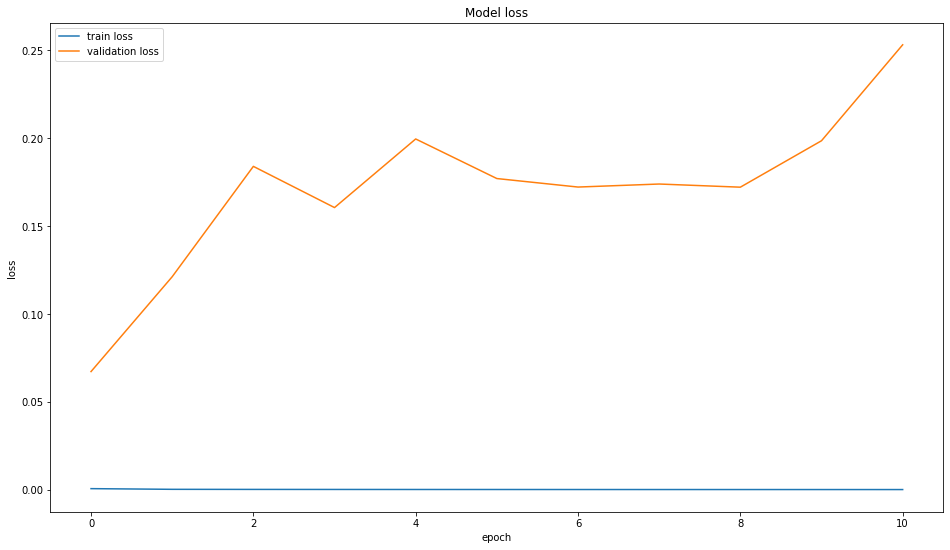

In [29]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [30]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'rsi_2', 'SMA_2',
       'rsi_6', 'SMA_6', 'macd'],
      dtype='object')

In [31]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [32]:
  data_val = X_scaler.fit_transform(df[['Open','High',	'Low'	,	'Volume','rsi_2','SMA_2','rsi_6','SMA_6','macd']].tail(20))
  val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [33]:
pred = lstm_model.predict(val_rescaled)
pred

array([[0.18928432, 0.16655764, 0.1694909 , 0.12301983, 0.11815897,
        0.10797707, 0.09604293, 0.11058532, 0.08157684, 0.06784771]],
      dtype=float32)

In [34]:
pred_Inverse = Y_scaler.inverse_transform(pred)

In [35]:
pred_Inverse

array([[1.61539   , 1.4251364 , 1.4496919 , 1.0606654 , 1.0199734 ,
        0.9347369 , 0.83483183, 0.9565715 , 0.7137309 , 0.5987993 ]],
      dtype=float32)

In [36]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [37]:
pred_Inverse[0]

array([1.61539   , 1.4251364 , 1.4496919 , 1.0606654 , 1.0199734 ,
       0.9347369 , 0.83483183, 0.9565715 , 0.7137309 , 0.5987993 ],
      dtype=float32)

In [45]:
validate = (df[['Open','High',	'Low'	,	'Volume','rsi_2','SMA_2','rsi_6','SMA_6','macd','Close']].tail(10))

In [46]:
timeseries_evaluation_metrics_func(validate['Close'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 3.2122441354012246
MAE is : 1.7709362531318664
RMSE is : 1.7922734544151526
MAPE is : 62.69421045939787
R2 is : -432.58116747381536



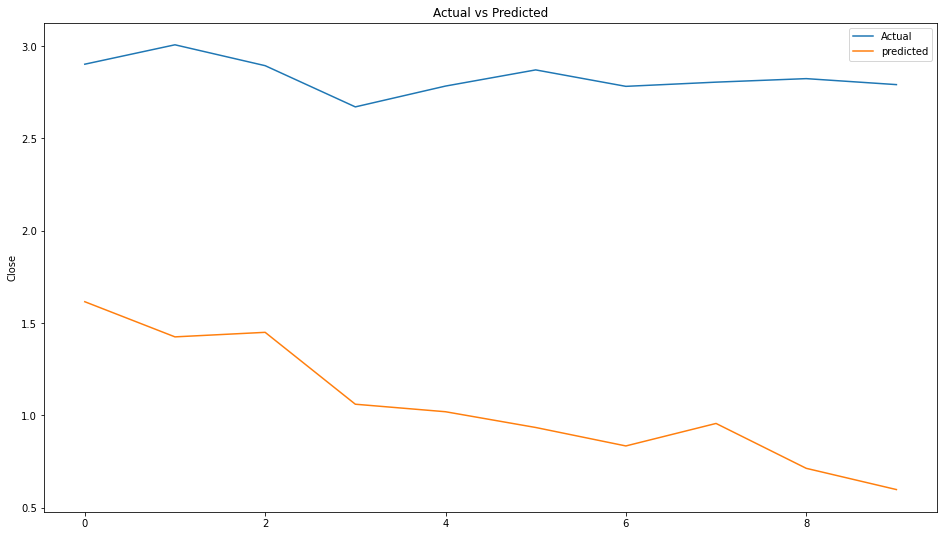

In [47]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Close']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Close")
plt.legend(('Actual','predicted'))
plt.show()